<hr style="height:.9px;border:none;color:#333;background-color:#333;"/> 
<hr style="height:.9px;border:none;color:#333;background-color:#333;"/> 

**Team_3_A2_Unsupervised_Analysis | DAT-5303 | Machine Learning**<br>
<br>Project: Apple Survey Analysis <br>
<br>Analysts: Raidhy Herrera | Mauriac Djofang | Cheng Xing <br>
<br>Dataset: Survey_Data<br>
<br>School: Hult International Business School<br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;"/> 
<hr style="height:.9px;border:none;color:#333;background-color:#333;"/> 

# Survey Analysis

# Introduction

   Apple is trying to understand consumer buying behavior regarding their customer's laptop decision-making process.
For this project, the analyst is encouraged to use the provided survey data based on the Big Five personality and the Hult DNA. In order to achieve the requested goal, we are going to conduct a survey analysis. 

## Import Libraries and Load Data¶

In [1]:
########################################
# importing packages
########################################
import numpy as np                                      # mathematical essentials
import random
import pandas            as pd                          # data science essentials
import matplotlib.pyplot as plt                         # fundamental data visualization
import seaborn           as sns                         # enhanced visualizations
from sklearn.preprocessing import StandardScaler        # standard scaler
from sklearn.decomposition import PCA                   # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering


# new libraries
from sklearn.decomposition import PCA            # pca
from sklearn.datasets      import load_digits    # digits dataset
from sklearn.manifold      import TSNE           # t-SNE




# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# specifying file name
file = './datasets/survey_data.xlsx'


# reading the file into Python
survey_data_df = pd.read_excel(file)



In [2]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

In [3]:
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

### Cleaning the data and creating new columns

Since our test data came from international school students, the data included was raw and uncleaned, so we needed to clean up the data. In this process, we created extra columns; we divided and grouped the surveys into two: Hult DNA and the five personality traits. By doing so, we can tailor our insight and recommendation for apple more accurately. 
We also dropped some duplicated columns that were repeated within the data as well unnecessary data 

In [4]:
# lowering all the data in What is your nationality? column

survey_data_df['nationality'] = survey_data_df['What is your nationality? '].str.lower()

# looping to nationality and creating countries

for name,col in survey_data_df.iterrows():
    
    
    if survey_data_df.loc[name, 'nationality'] == 'brazilian':
        survey_data_df.loc[name, 'nationality'] = 'brazil' 
        
    
    elif survey_data_df.loc[name, 'nationality'] == 'canadian':
        survey_data_df.loc[name, 'nationality'] = 'canada'
    
    elif survey_data_df.loc[name, 'nationality'] == 'chinese':
        survey_data_df.loc[name, 'nationality'] = 'china'
        
    elif survey_data_df.loc[name, 'nationality'] == 'colombian':
        survey_data_df.loc[name, 'nationality'] = 'colombia'
        
    elif survey_data_df.loc[name, 'nationality'] == 'congolese' or survey_data_df.loc[name, 'nationality'] == 'congolese (dr congo)':
        survey_data_df.loc[name, 'nationality'] = 'congo'
        
    elif survey_data_df.loc[name, 'nationality'] == 'Czech Republic':
        survey_data_df.loc[name, 'nationality'] = 'czech'
        
    elif survey_data_df.loc[name, 'nationality'] == 'ecuadorian' or survey_data_df.loc[name, 'nationality'] == 'ecuador ':
        survey_data_df.loc[name, 'nationality'] = 'ecuador'
    
    elif survey_data_df.loc[name, 'nationality'] == 'german' or survey_data_df.loc[name, 'nationality'] == 'german/american':
        survey_data_df.loc[name, 'nationality'] = 'germany'
        
    elif survey_data_df.loc[name, 'nationality'] == 'ghanaian':
        survey_data_df.loc[name, 'nationality'] = 'ghana'
    elif survey_data_df.loc[name, 'nationality'] == 'indian':
        survey_data_df.loc[name, 'nationality'] = 'india'
        
    elif survey_data_df.loc[name, 'nationality'] == 'indian.':
        survey_data_df.loc[name, 'nationality'] = 'india'
        
    elif survey_data_df.loc[name, 'nationality'] == 'indonesian':
        survey_data_df.loc[name, 'nationality'] = 'indonesia'
    
    elif survey_data_df.loc[name, 'nationality'] == 'italian' or survey_data_df.loc[name, 'nationality']== 'italian and spanish':
        survey_data_df.loc[name, 'nationality'] = 'italy'
    elif survey_data_df.loc[name, 'nationality'] == 'nigerian':
        survey_data_df.loc[name, 'nationality'] = 'nigeria'      
        
    elif survey_data_df.loc[name, 'nationality'] == 'peruvian':
        survey_data_df.loc[name, 'nationality'] = 'peru'           
        
    elif survey_data_df.loc[name, 'nationality'] == 'republic of korea' or survey_data_df.loc[name, 'nationality'] == 'south korea':
        survey_data_df.loc[name, 'nationality'] = 'korea'     
    

    elif survey_data_df.loc[name, 'nationality'] == 'russian':
        survey_data_df.loc[name, 'nationality'] = 'russia'    
        
    elif survey_data_df.loc[name, 'nationality'] == 'spanish':
        survey_data_df.loc[name, 'nationality'] = 'spain' 
 
    elif survey_data_df.loc[name, 'nationality'] == 'filipino':
        survey_data_df.loc[name, 'nationality'] = 'philippines'
        
    elif survey_data_df.loc[name, 'nationality'] == 'american'or survey_data_df.loc[name, 'nationality'] == 'usa':
        survey_data_df.loc[name, 'nationality'] = 'usa'
        
    elif survey_data_df.loc[name, 'nationality'] == 'british, indian':
        survey_data_df.loc[name, 'nationality'] = 'british'
        
    elif survey_data_df.loc[name, 'nationality'] == 'dominican ':
        survey_data_df.loc[name, 'nationality'] = 'dominican_Republic'

        
    else:
        continue

        
        

In [5]:
# grouping age and creating a new column

#creating empty place_holder
place_holder = []

for age,col in survey_data_df.iterrows():
    
    if survey_data_df.loc[age, 'What is your age?'] >= 0 and survey_data_df.loc[age, 'What is your age?'] < 20:
        survey_data_df.loc[age, 'What is your age?'] = '0-20 years'
    elif survey_data_df.loc[age, 'What is your age?'] >= 20 and survey_data_df.loc[age, 'What is your age?'] < 25:
        survey_data_df.loc[age, 'What is your age?'] = '20-25 years' 
    elif survey_data_df.loc[age, 'What is your age?'] >= 25 and survey_data_df.loc[age, 'What is your age?'] < 30:
        survey_data_df.loc[age, 'What is your age?'] = '25-30 years' 
    elif survey_data_df.loc[age, 'What is your age?'] >= 30 and survey_data_df.loc[age, 'What is your age?'] < 35:
        survey_data_df.loc[age, 'What is your age?'] = '30-35 years'
    elif survey_data_df.loc[age, 'What is your age?'] >= 30:
        survey_data_df.loc[age, 'What is your age?'] = '35+ years'
    else:
        continue
        
    


In [6]:
# creating a list by attributing each continents a country 
 
europe = ['belgian ','spain','portuguese','germany','russia', 'british','czech','italy','norwegian','russia','spain','swiss','turkish','ukrainian','belarus','germany']


africa = ['congo','ghana','kenyan','mauritius','nigeria','ugandan','nigeria']


asia = ['india','indonesia','philippines','kyrgyz','china','vietnamese','thai','taiwan','korea','japan','indonesia','china','pakistani']


north_america = ['usa','mexican','dominican_Republic','canada']


south_america = ['brazil','ecuador','venezuelan','costarrican','colombia','panama','peru']

In [7]:
# creating an empty a second place_holder for continent

place_holder2 = []

for col in survey_data_df['nationality']:
    
    if col in europe:
        place_holder2.append('europe')
    elif col in africa:
        place_holder2.append('africa')

    elif col in asia:
        place_holder2.append('asia')  
        
    elif col in north_america:
        place_holder2.append('north_america')
        
    elif col in south_america:
        place_holder2.append('south_america')
        
    else:
        place_holder2.append('prefer not to answer')
survey_data_df['continents'] = pd.Series(place_holder2)

In [8]:

survey_data_new = pd.DataFrame(survey_data_df)

## Dictionary 

 To facilitate our survey's grouping and division, we created a dictionary for personality five (Grouping all the columns concerned)  and Hult DNA.

#### Dictionary for personality five 

In [9]:
#reversing for the code for the negative columns 
survey_data_df["Am not interested in other people's problems"] = survey_data_df["Am not interested in other people's problems"].replace(to_replace = [5,4,2,1],
                                                                          value=[1,2,4,5])

survey_data_df["Don't talk a lot"] = survey_data_df["Don't talk a lot"].replace(to_replace = [5,4,2,1],
                                                                          value=[1,2,4,5])

survey_data_df["Do not have a good imagination"] = survey_data_df["Do not have a good imagination"].replace(to_replace = [5,4,2,1],
                                                                          value=[1,2,4,5])

survey_data_df["Am not really interested in others"] = survey_data_df["Am not really interested in others"].replace(to_replace = [5,4,2,1],
                                                                          value=[1,2,4,5])

survey_data_df["Don't like to draw attention to myself"] = survey_data_df["Don't like to draw attention to myself"].replace(to_replace = [5,4,2,1],
                                                                          value=[1,2,4,5])

In [10]:
# classifying the personality data based on the five personality classifaction trait 

positive = pd.DataFrame(survey_data_df, columns = ["Am the life of the party",
                        "Feel comfortable around people",
                         "Start conversations",
                         "Talk to a lot of different people at parties",
                         "Don't mind being the center of attention"])
survey_data_df['Extraversion_pos'] = positive.sum(axis=1)


negative = pd.DataFrame(survey_data_df, columns = ["Don't talk a lot",
                         "Keep in the background",
                         "Have little to say",
                         "Don't like to draw attention to myself",
                         "Am quiet around strangers"])
survey_data_df['Extraversion_neg'] = negative.sum(axis=1)

##################################################################### 
positive = pd.DataFrame(survey_data_df, columns = ["Am relaxed most of the time",
                        "Seldom feel blue"])
survey_data_df['Neuroticism_posit'] = positive.sum(axis=1)    
    
negative = pd.DataFrame(survey_data_df, columns = ["Get stressed out easily",
                    "Worry about things",
                    "Am easily disturbed",
                    "Get upset easily",
                     "Change my mood a lot",
                     "Have frequent mood swings",
                    "Get irritated easily",
                    "Often feel blue"])
survey_data_df['Neuroticism_neg'] = negative.sum(axis=1) 

#####################################################################################

positive = pd.DataFrame(survey_data_df, columns = ["Am interested in people",
                      "Sympathize with others' feelings",
                      "Have a soft heart",
                      "Take time out for others",
                      "Feel others' emotions",
                      "Make people feel at ease"])
survey_data_df['Agreeableness_posit'] = positive.sum(axis=1)


negative = pd.DataFrame(survey_data_df, columns = ["Feel little concern for others",
                      "Insult people",
                      "Am not interested in other people's problems",
                      "Am not really interested in others"])
survey_data_df['Agreeableness_neg'] = negative.sum(axis=1)

##################################################################################

positive = pd.DataFrame(survey_data_df, columns = ["Have a rich vocabulary",
                 "Have a vivid imagination",
                 "Have excellent ideas",
                 "Am quick to understand things",
                 "Use difficult words",
                 "Spend time reflecting on things",
                 "Am full of ideas"])
survey_data_df['Openness_posit'] = positive.sum(axis=1)


negative = pd.DataFrame(survey_data_df, columns = ["Have difficulty understanding abstract ideas",
                 "Am not interested in abstract ideas",
                 "Do not have a good imagination"])
survey_data_df['Openness_neg'] = negative.sum(axis=1)

###########################################################################

positive = pd.DataFrame(survey_data_df, columns = ["Am always prepared",
                          "Pay attention to details",
                          "Get chores done right away",
                          "Like order",
                          "Follow a schedule",
                          "Am exacting in my work"])
survey_data_df['Conscientiousness_posit'] = positive.sum(axis=1)


negative = pd.DataFrame(survey_data_df, columns = ["Leave my belongings around",
                          "Make a mess of things",
                          "Often forget to put things back in their proper place",
                          "Shirk my duties"])
survey_data_df['Conscientiousness_neg'] = negative.sum(axis=1)


In [11]:
#adding a new column
survey_data_df["Extraversion"] = (survey_data_df["Extraversion_pos"] + survey_data_df["Extraversion_neg"] )
survey_data_df["Neuroticism"] = (survey_data_df["Neuroticism_posit"] + survey_data_df["Neuroticism_neg"]) 
survey_data_df["Agreeableness"] = (survey_data_df["Agreeableness_posit"] + survey_data_df["Agreeableness_neg"])
survey_data_df["Openness"] = (survey_data_df["Openness_posit"] + survey_data_df["Openness_neg"])
survey_data_df["Conscientiousness"] = (survey_data_df["Conscientiousness_posit"] + survey_data_df["Conscientiousness_neg"])

#### Dictionary Hult DNA

In [12]:
thinking = pd.DataFrame(survey_data_df, columns = ["See underlying patterns in complex situations",
                            "Don't  generate ideas that are new and different",
                            "Demonstrate an awareness of personal strengths and limitations", 
                            "Translate ideas into plans that are organized and realistic",
                            "Coach teammates for performance and growth"])
survey_data_df['thinking_hultDNA'] = thinking.sum(axis=1)


communicating = pd.DataFrame(survey_data_df, columns = ["Display a growth mindset",
                              "Listen carefully to others",
                              "Don't persuasively sell a vision or idea",
                              "Effectively negotiate interests, resources, and roles",
                              "Seek and use feedback from teammates"])
survey_data_df['communicating_hultDNA'] = communicating.sum(axis=1)

team_building = pd.DataFrame(survey_data_df, columns = ["Respond effectively to multiple priorities",
                              "Take initiative even when circumstances, objectives, or rules aren't clear",
                              "Encourage direct and open discussions",
                              "Build cooperative relationships",
                              "Work well with people from diverse cultural backgrounds",
                              "Can't rally people on the team around a common goal",
                              "Resolve conflicts constructively",
                              "Drive for results"])
survey_data_df['team_building_hultDNA'] = team_building.sum(axis=1)

#### Droping and seperating data

In [13]:
survey_data_df.drop(survey_data_df.columns[[0,26,58,59,60]],  inplace = True, axis=1)


survey_data_clean = survey_data_df.drop(['What laptop do you currently have?',
                                              'What laptop would you buy in next assuming if all laptops cost the same?',
                                               'What program are you in?','What is your age?','Gender','continents',
                                               'What is your ethnicity?','What is your nationality? ','nationality',
                                                ], axis = 1)


#Dividing the entire dataset based on the variables for a better analysis

Personality_five = survey_data_clean.loc[:,['Extraversion', 'Neuroticism', 'Agreeableness', 'Openness', 'Conscientiousness']]
hult_dna = survey_data_clean.loc[:,['thinking_hultDNA', 'communicating_hultDNA', 'team_building_hultDNA']]


# Personality Five Analysis

#### Scaling the Personality_five

In [14]:


# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(Personality_five)

# TRANSFORMING our data after fit
p5_scaled = scaler.transform(Personality_five)

# converting scaled data into a DataFrame
p5_scaled_df = pd.DataFrame(p5_scaled)


# reattaching column names
p5_scaled_df.columns = Personality_five.columns


# checking pre- and post-scaling variance
print(np.var(Personality_five), '\n\n')
print(np.var(p5_scaled_df))


Extraversion         15.875539
Neuroticism          35.998082
Agreeableness        21.415312
Openness             13.586552
Conscientiousness    15.088071
dtype: float64 


Extraversion         1.0
Neuroticism          1.0
Agreeableness        1.0
Openness             1.0
Conscientiousness    1.0
dtype: float64


 #### Develop a PCA object with no limit and a limit to principal 

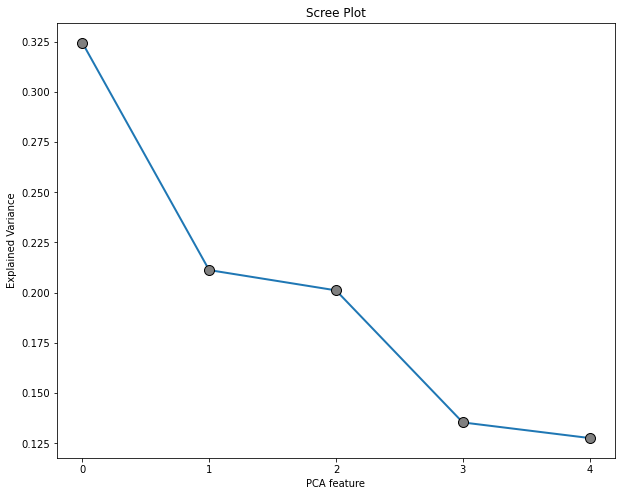

In [15]:
# INSTANTIATING a PCA object with no limit to principal components

pca = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
p5_survey_pca = pca.fit_transform(p5_scaled_df)


# calling the scree_plot function
scree_plot(pca_object = pca)

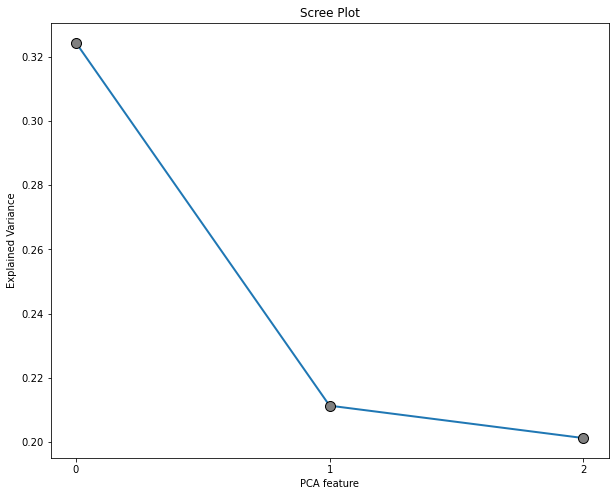

In [16]:
# INSTANTIATING a new model using the first three principal components
pca_1 = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
survey_pca_1 = pca_1.fit_transform(p5_scaled_df)


# calling the scree_plot function
scree_plot(pca_object = pca_1)

In [17]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(p5_scaled_df.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_1.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(p5_scaled_df.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


3 Components Factor Loadings
------------------------------
{factor_loadings_3.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                      0     1     2     3     4
Extraversion       0.50  0.50  0.15  0.31  0.62
Neuroticism        0.28 -0.65  0.51  0.48 -0.07
Agreeableness      0.50  0.12 -0.54  0.37 -0.56
Openness           0.40 -0.53 -0.46 -0.41  0.42
Conscientiousness  0.51  0.17  0.46 -0.61 -0.36


3 Components Factor Loadings
------------------------------
                      0     1     2
Extraversion       0.50  0.50  0.15
Neuroticism        0.28 -0.65  0.51
Agreeableness      0.50  0.12 -0.54
Openness           0.40 -0.53 -0.46
Conscientiousness  0.51  0.17  0.46



<ipython-input-17-0c5baabc887c>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))
<ipython-input-17-0c5baabc887c>:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_1.components_))


### Analyzing and naming each principal component based on factor loading

**Supporter:** The 3 most valuables percentages in terms of positive correlation are Conscientiousness, Extraversion, and Agreeableness with percentages of 51.17%, 49.81%, and 49.76% respectively.

  A person with these qualities would regularly try to stay in touch with others, demonstrate empathy and be precise about how they do things. This persona called our attention because it is willing to stay in touch, and it will be likely to acquire a laptop to find easy ways to connect with others. At the same time, supporters are less likely to adapt to change or deal with stress easily. 


**Positive-relaxer:** The most 2 valuable percentages in terms of negative correlation are neuroticism and openness, with percentages of -65.30% and -52.75%, respectively. We were able to identify that the qualities that predominate the most are very relaxed, rarely feels sad, and resisting new ideas. 

 A person with these qualities would regularly dislike the change and can easily deal with stress. This personality caught our attention because it is the opposite of the supporter in terms of openness and conscientiousness, which means that dealing with personality type could be tricky. After all, since it does worry too much, it will take less effort to decide on a computer, but at the same time, these people would not feel motivated to update a laptop because they could not see new technologies as valuable. 

**The-bomb:** The most 2 valuable percentages in terms of negative correlation are agreeableness and openness, with percentages of -53.91 and -46.60%. We were able to identify that the qualities that predominate the most are little interest for others. This personality is the opposite mixture of the supporter and the positive relaxer because it has openness and agreeableness but with a negative influence. 

 Also with a 51 % neuroticism the person would regularly manipulate others to receive what they want and not enjoy new ideas or activities. This persona tends to know what they want, and selling a computer could be a challenge because when a person is highly demanding, not always conditions can be met. The price could also be a constraint. 


**Self-creative:** The most 2 valuable percentages in terms of negative correlation are openness and conscientiousness with percentages of -40.71% and -60.81%, respectively, and positive correlation in terms of neuroticism and agreeableness. 

 Qualities that predominate the most are caring for others and getting stressed easily. This personality called our attention because even though their extroversion isn’t as high as its openness and conscientiousness, they will always look for ways to help others which means it has a balance of multiple qualities at the same time. 

 This person would regularly resist new ideas from others because they consider themselves self-sufficient. 
 
**introvertly-disorganise**: The most 2 valuable percentages in terms of correlation are extraversion and agreeableness with percentages of 61% and -55%, respectively, and positive correlation in terms of openness and negative correlation in terms of conscientiousness.This group of people tend to enjoy human interactions and to be enthusiastic, talkative. They are also imaginative, curious, and open-minded.

They may prefer a popular type of computer to bring them closer to others, while their lower Agreeableness makes them sensitive to the price/performance ratio of the computer to maximize their benefits. Due to the nature of Openness they are more interested in computers with good design and outstanding ideas.


In [18]:
#  naming each principal component
factor_loadings.columns = ['supporter',                 # No Vegan, No Vege, No Indian
                             'positive relaxer',          # No Med, No ME, No Wine
                             'the bomb',
                           'self-creative',
                           'introvertly-disorganise'
                            ] # Med, No Wine


# checking the result
factor_loadings

,supporter,positive relaxer,the bomb,self-creative,introvertly-disorganise
Extraversion,0.498150,0.501532,0.152303,0.313908,0.615287
Neuroticism,0.280784,-0.653035,0.513811,0.475898,-0.065006
Agreeableness,0.497661,0.117182,-0.539120,0.373368,-0.555471
Openness,0.404338,-0.527587,-0.460708,-0.407138,0.424440
Conscientiousness,0.511715,0.173007,0.458149,-0.608127,-0.358467


In [19]:
# analyzing factor strengths
p5_pca_reduced = pca.transform(p5_scaled_df)


# converting to a DataFrame
p5_pca_df = pd.DataFrame(p5_pca_reduced)


# renaming columns
p5_pca_df.columns = factor_loadings.columns


# checking the results
p5_pca_df


,supporter,positive relaxer,the bomb,self-creative,introvertly-disorganise
0,-0.139431,0.349837,0.755406,-0.548187,0.292592
1,0.131401,-1.400962,0.790227,-0.794122,-0.422238
2,-1.433730,0.555123,0.593868,0.054835,0.905487
3,1.971766,-1.204990,-1.321876,0.794699,0.495574
4,0.794454,-0.630647,0.995754,0.105597,0.350571
5,-0.501153,-0.870014,0.611625,1.570418,-0.281320
6,0.022005,0.050729,0.653175,1.719188,-0.725771
7,0.444158,1.468685,-0.695134,0.090143,0.165212
8,-1.612494,-0.083624,0.998169,0.047345,-0.564904
9,-0.203566,0.967377,-0.737448,-0.620337,-0.568323


##  Clustering¶


In [20]:
# checking variance amongst clusters
np.var(p5_pca_df)

supporter                  1.622178
positive relaxer           1.056348
the bomb                   1.005867
self-creative              0.677220
introvertly-disorganise    0.638387
dtype: float64

#### preparing a scaled version of the factor loadings - personality five

In [21]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(p5_pca_df)


# TRANSFORMING our data after fit
p5_scaled_pca = scaler.transform(p5_pca_df)


# converting scaled data into a DataFrame
p5pca_scaled = pd.DataFrame(p5_scaled_pca)


# reattaching column names
p5pca_scaled.columns = ['supporter',                 # No Vegan, No Vege, No Indian
                             'positive relaxer',          # No Med, No ME, No Wine
                             'the bomb',
                           'self-creative',
                           'introvertly-disorganise'] 


# checking pre- and post-scaling variance
print(pd.np.var(p5_pca_df), '\n\n')
print(pd.np.var(p5pca_scaled))

supporter                  1.622178
positive relaxer           1.056348
the bomb                   1.005867
self-creative              0.677220
introvertly-disorganise    0.638387
dtype: float64 


supporter                  1.0
positive relaxer           1.0
the bomb                   1.0
self-creative              1.0
introvertly-disorganise    1.0
dtype: float64


<ipython-input-21-50e725710980>:26: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(p5_pca_df), '\n\n')
<ipython-input-21-50e725710980>:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(p5pca_scaled))


## Developing Dendogramm

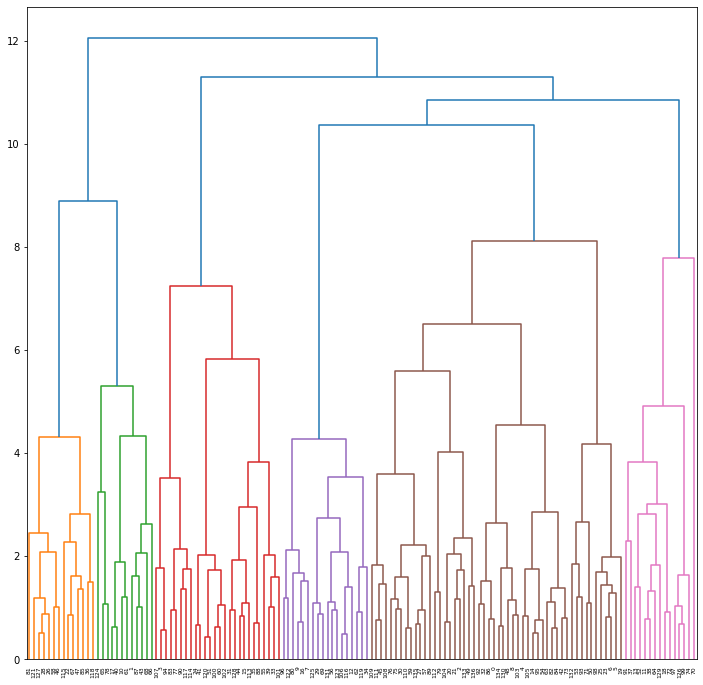

In [22]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = p5pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot

plt.show()

## Developing inertia

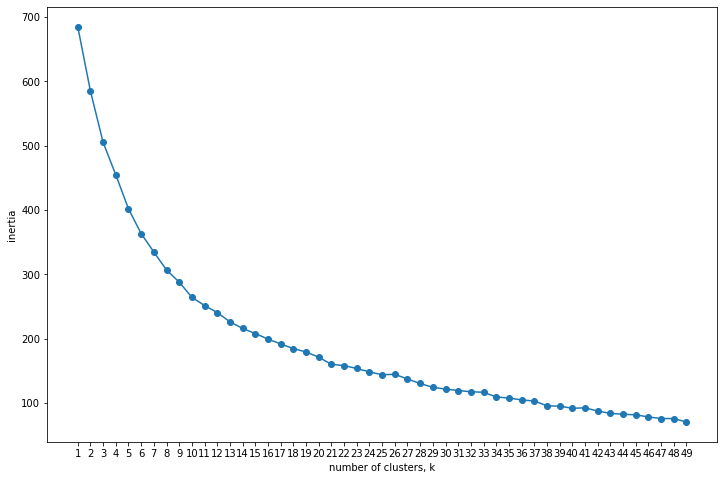

In [23]:
# calling the inertia_plot() function
interia_plot(data = p5pca_scaled)

#### K means model with five cluster

Prior to continuing our analysis using clusters, we decided on 5 clusters because when trying 3 or 4 clusters, the percentages were far off from one and another. We concluded that having 5 clusters was more valuable and accurate.

In [24]:
# INSTANTIATING a k-Means object with clusters
ps5_k_pca = KMeans(n_clusters   = 5,
                         random_state = 219)


# fitting the object to the data
ps5_k_pca.fit(p5pca_scaled)


# converting the clusters to a DataFrame
p5_kmeans_pca = pd.DataFrame({'Cluster': ps5_k_pca.labels_})


# checking the results
print(p5_kmeans_pca.iloc[: , 0].value_counts())

3    34
1    29
0    29
2    24
4    21
Name: Cluster, dtype: int64


#### Display Centroid

In [25]:
# storing cluster centers
centroids_pca = ps5_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['supporter',                 
                             'positive relaxer',          
                             'the bomb',
                           'self-creative',
                           'introvertly-disorganise'] 


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,supporter,positive relaxer,the bomb,self-creative,introvertly-disorganise
0,0.18,1.11,-0.31,-0.25,-0.77
1,-0.40,-0.91,-0.47,-0.57,-0.48
2,0.65,-0.17,-0.82,0.08,1.09
3,-0.78,0.05,0.34,0.88,0.35
4,0.83,-0.17,1.48,-0.37,-0.09


In [26]:
# concatenating cluster memberships with principal components
p5_lst_pca_df = pd.concat([p5_kmeans_pca,
                         Personality_five],
                         axis = 1)


# checking results
p5_lst_pca_df


# concatenating demographic information with pca-clusters
final_p5_lst_pca_df = pd.concat([survey_data_df.loc[ : , ['What laptop would you buy in next assuming if all laptops cost the same?'
                                                          , 'What program are you in?','What is your age?','What laptop do you currently have?',
                                                          'continents']],
                                p5_lst_pca_df],
                                axis = 1)


# renaming columns
final_p5_lst_pca_df.columns = ['What laptop would you buy in next assuming if all laptops cost the same?', 
                              'What program are you in?', 
                              'What is your age?',
                               'What laptop do you currently have?',
                              'continents', 
                              'Cluster',
                              'supporter',                 
                             'positive relaxer',          
                             'the bomb',
                           'self-creative',
                           'introvertly-disorganise']


# checking the results
print(final_p5_lst_pca_df.head(n = 5))


  What laptop would you buy in next assuming if all laptops cost the same?          What program are you in? What is your age? What laptop do you currently have?     continents  Cluster  supporter  positive relaxer  the bomb  self-creative  introvertly-disorganise
0                                                                  Macbook     DD (MIB & Business Analytics)       25-30 years                            Macbook  south_america        4         32                27        31             33                       34
1                                                           Windows laptop       One year Business Analytics       25-30 years                     Windows laptop  south_america        1         27                34        32             36                       35
2                                                           Windows laptop       One year Business Analytics       25-30 years                     Windows laptop           asia        3         32         

In [27]:
# renaming What laptop would you buy in next assuming if all laptops cost the same?
laptops_desired = {1 : 'Chromebook',
                 2 : 'Windows laptop',
                 3 :  'Macbook'}


final_p5_lst_pca_df['What laptop would you buy in next assuming if all laptops cost the same?'].replace(laptops_desired, inplace = True)

laptops_you_have = {1 : 'Windows laptop',
                 2 : 'Macbook' }


final_p5_lst_pca_df['What laptop do you currently have?'].replace(laptops_you_have, inplace = True)



# renaming What program are you in?
programm_enrolled = {1 : 'DD (MIB & Business Analytics)',
                2 : 'DD (MBA & Business Analytics)',
                3 : 'DD (MBA & Business Analytics)',
                4 :  'One year Business Analytics'}


final_p5_lst_pca_df['What program are you in?'].replace(programm_enrolled, inplace = True)

# renaming What is your age? 
age_group = {1 : '0-20 years',
                2 : '20-25 years',
                3 : '25-30 years',
                4 :  '30-35 years',
                5 : '35+ years'}


final_p5_lst_pca_df['What is your age?'].replace(age_group, inplace = True)

# renaming What is your age? 
continents_names = {1 :'europe',
                2 : 'africa',
                3 : 'asia',
                4 :  'north_america',
                5 : 'south_america'}


final_p5_lst_pca_df['continents'].replace(continents_names, inplace = True)

# renaming What is your age?
cluster_names = {0 : 'Cluster 0',
                 1 : 'Cluster 1',
                 2 : 'Cluster 2',
                 3 : 'Cluster 3',
                 4 : 'Cluster 4'}


final_p5_lst_pca_df['Cluster'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df = final_p5_lst_pca_df


# checking results
data_df

,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,What laptop do you currently have?,continents,Cluster,supporter,positive relaxer,the bomb,self-creative,introvertly-disorganise
0,Macbook,DD (MIB & Business Analytics),25-30 years,Macbook,south_america,Cluster 4,32,27,31,33,34
1,Windows laptop,One year Business Analytics,25-30 years,Windows laptop,south_america,Cluster 1,27,34,32,36,35
2,Windows laptop,One year Business Analytics,25-30 years,Windows laptop,asia,Cluster 3,32,25,28,31,29
3,Windows laptop,One year Business Analytics,25-30 years,Windows laptop,asia,Cluster 2,34,34,42,41,30
4,Windows laptop,DD (MBA & Disruptive innovation),25-30 years,Macbook,asia,Cluster 4,33,35,33,35,34
5,Macbook,DD (MIB & Business Analytics),20-25 years,Macbook,asia,Cluster 3,30,37,35,31,28
6,Macbook,DD (MIB & Business Analytics),20-25 years,Windows laptop,north_america,Cluster 3,32,35,38,29,30
7,Windows laptop,DD (MIB & Business Analytics),25-30 years,Windows laptop,europe,Cluster 0,35,21,38,33,32
8,Macbook,DD (MBA & Business Analytics),35+ years,Macbook,asia,Cluster 3,27,29,30,29,31
9,Chromebook,DD (MBA & Business Analytics),30-35 years,Windows laptop,south_america,Cluster 0,30,20,37,33,33


## BOX PLOT

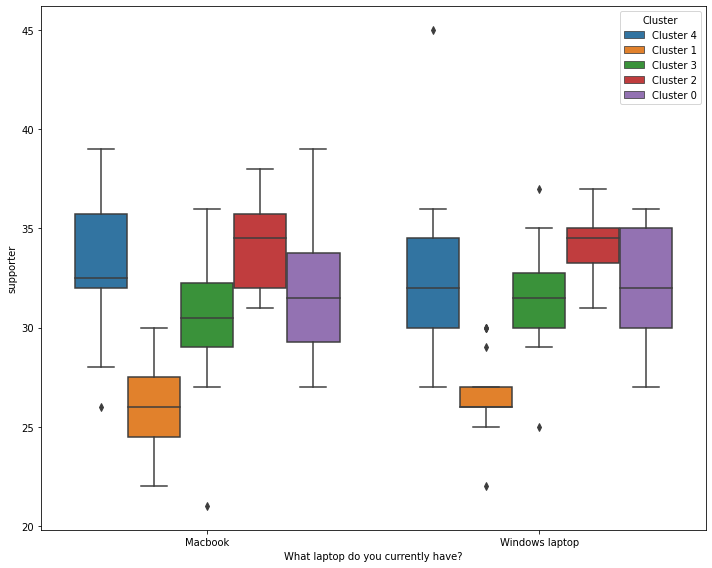

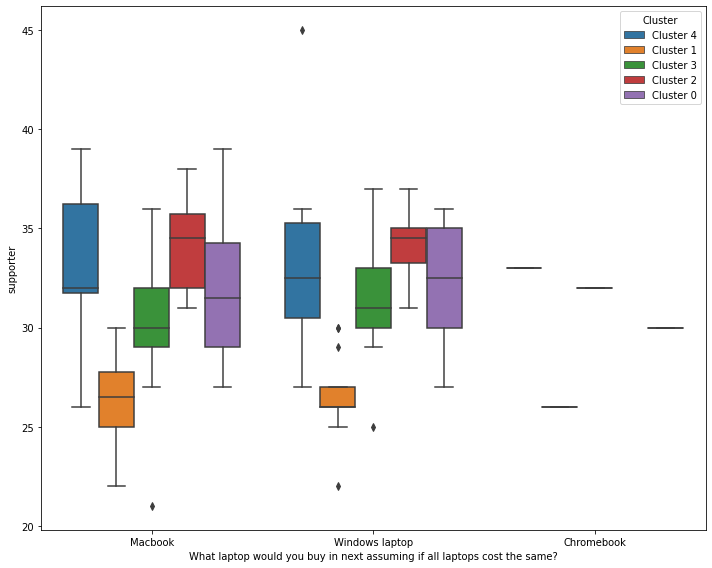

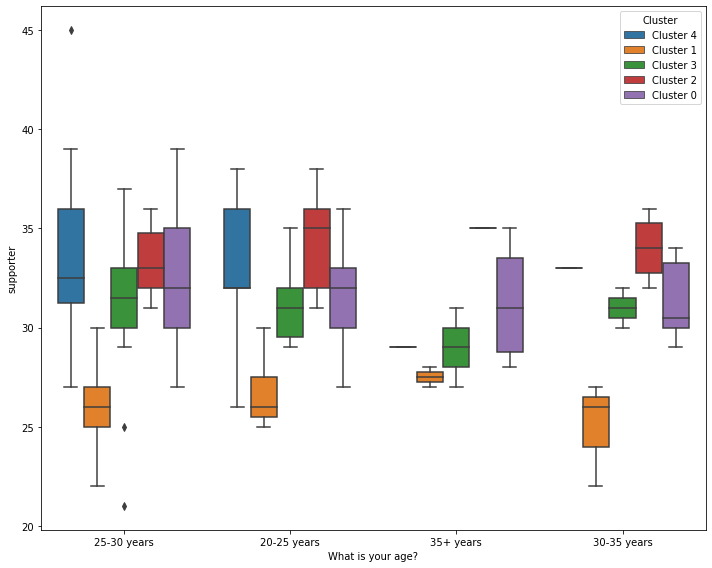

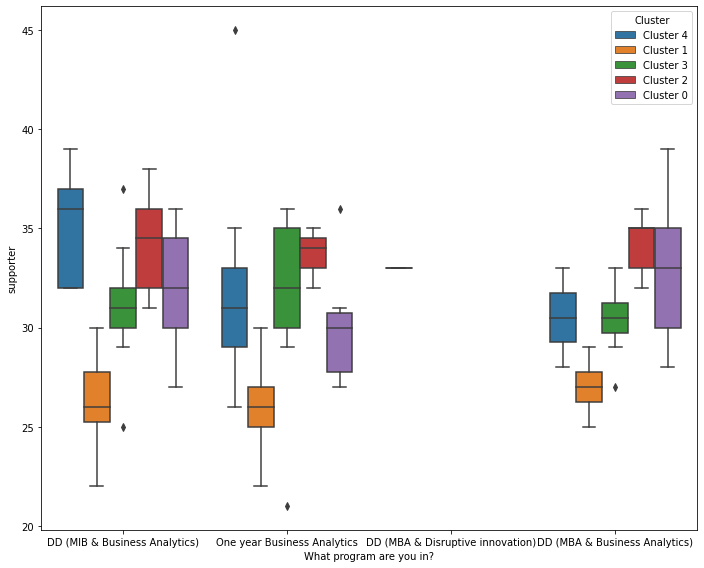

In [28]:
########################
# Channel
########################

# 
fig, ax = plt.subplots(figsize = (10, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'supporter',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# What laptop would you buy in next assuming if all laptops cost the same?
fig, ax = plt.subplots(figsize = (10, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'supporter',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()


# What is your age?
fig, ax = plt.subplots(figsize = (10, 8))
sns.boxplot(x = 'What is your age?',
            y = 'supporter',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# What is your age?
fig, ax = plt.subplots(figsize = (10, 8))
sns.boxplot(x = 'What program are you in?',
            y = 'supporter',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()


### Boxplot Analysis- Personality Five

For the personality analysis we identified that the bomb persona highly relates with Mackbook products in cluster 0 and 1. By looking at the boxplot we identified that cluster 0 is the one with the most interest because the higher the mean the higher the preference oppose to the cluster 1 that it also prefers Macbook but not as much as cluster 0.

The bomb would generally prefer Macbook and not having a huge inclination for one of the two brands also tell us that maybe a person who currently owns a Macbook would generally consider Macbook as their primarly provider in a future purchase.

Not having relevant preference for Chromebook means to Apple that people are loyal to the brand. Our assumption is more related to uniquesness in terms of software and UX.

Something to take into consideration the fact the boxplot highlights the ideal targeted age which is between 20 to 30 years old.

Since the cluster 2 does not provide valuable insights because this group is neutral about all the consider brands. The opportunities are for cluster 2, since further investigation is needed to capture why this cluster prefers Windows despite of belonging to the bomb persona.

 # HULT DNA  Analysis

#### Scaling the Hult DNA

In [29]:


# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(hult_dna)

# TRANSFORMING our data after fit
hult_scaled = scaler.transform(hult_dna)

# converting scaled data into a DataFrame
hult_scaled_df = pd.DataFrame(hult_scaled)


# reattaching column names
hult_scaled_df.columns = hult_dna.columns


# checking pre- and post-scaling variance
print(np.var(hult_dna), '\n\n')
print(np.var(hult_scaled_df))


thinking_hultDNA          5.526134
communicating_hultDNA     5.298418
team_building_hultDNA    13.932975
dtype: float64 


thinking_hultDNA         1.0
communicating_hultDNA    1.0
team_building_hultDNA    1.0
dtype: float64


#### Develop a PCA object with no limit and a limit to principal 

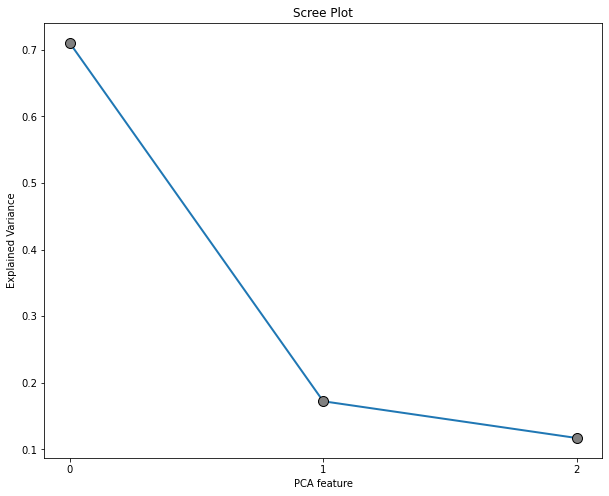

In [30]:
# INSTANTIATING a PCA object with no limit to principal components
pca_0 = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
hult_survey_pca = pca_0.fit_transform(hult_scaled_df)


# calling the scree_plot function
scree_plot(pca_object = pca_0)

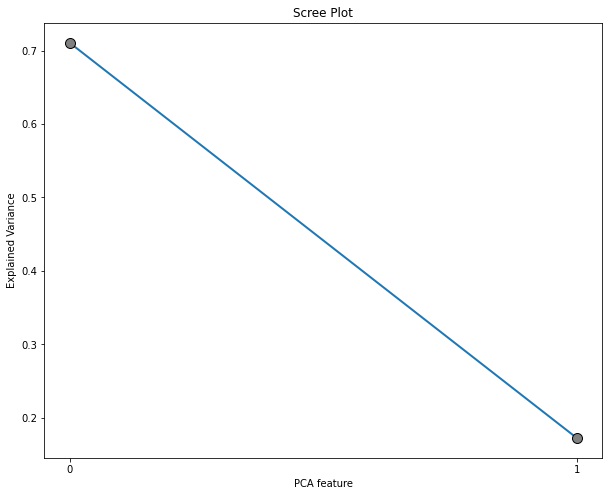

In [31]:
# INSTANTIATING a new model using the first three principal components
pca_2 = PCA(n_components = 2,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
hult_survey_pca = pca_2.fit_transform(hult_scaled_df)


# calling the scree_plot function
scree_plot(pca_object = pca_2)

In [32]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings_1 = pd.DataFrame(pd.np.transpose(pca_0.components_))


# naming rows as original features
factor_loadings_1 = factor_loadings_1.set_index(hult_scaled_df.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_2 = pd.DataFrame(pd.np.transpose(pca_2.components_))


# naming rows as original features
factor_loadings_2 = factor_loadings_2.set_index(hult_scaled_df.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings_1.round(2)}


2 Components Factor Loadings
------------------------------
{factor_loadings_2.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                          0     1     2
thinking_hultDNA      -0.57  0.65 -0.50
communicating_hultDNA -0.56 -0.75 -0.35
team_building_hultDNA -0.60  0.08  0.79


2 Components Factor Loadings
------------------------------
                          0     1
thinking_hultDNA      -0.57  0.65
communicating_hultDNA -0.56 -0.75
team_building_hultDNA -0.60  0.08



<ipython-input-32-3ab5f10d2fa9>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_1 = pd.DataFrame(pd.np.transpose(pca_0.components_))
<ipython-input-32-3ab5f10d2fa9>:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_2 = pd.DataFrame(pd.np.transpose(pca_2.components_))


### Analyzing and naming each principal component based on factor loading-HULT DNA

In [33]:
#  naming each principal component
factor_loadings_1.columns = ['shy',                 
                             'less-communicator',        
                             'inspirational-foster']


# checking the result
factor_loadings_1


,shy,less-communicator,inspirational-foster
thinking_hultDNA,-0.569793,0.653092,-0.498805
communicating_hultDNA,-0.558203,-0.753045,-0.348328
team_building_hultDNA,-0.603113,0.079959,0.793638


To choose the PCA name,we conclude on three main dimensions of hult DNA are thinking, communication and team building.

**shy:**
This group of people show negative correlations in all three hult DNA traits.These people present more than 50% barriers in all three areas of thinking, communication and team building. We summarize this group as shy people.

**less-communicator:**
The second group are at a great disadvantage in terms of communicating which is more than 75%, but more than 65% of them are better at focusing on analyzing problems and optimizating method. There is no significant relationship on team building ability.So we call them less-communicator.

**inspirational-foster:**
The third group was slightly weaker in both thinking and communication skills (-50% and -35%, respectively), but almost 80% showed extremely strong characteristics in team building skills, and we call this group inspirational-foster.


In [34]:
# analyzing factor strengths per customer
hult_pca_reduced = pca_0.transform(hult_scaled_df)


# converting to a DataFrame
hult_pca_df = pd.DataFrame(hult_pca_reduced)


# renaming columns
hult_pca_df.columns = factor_loadings_1.columns


# checking the results
hult_pca_df


,shy,less-communicator,inspirational-foster
0,0.195777,-0.072313,-0.193820
1,0.276748,-0.215117,1.232355
2,2.054483,0.872785,-0.226798
3,-1.986038,-1.465944,1.326624
4,1.488547,-0.130089,-0.893396
5,1.326734,-1.318609,-0.559056
6,-1.016226,0.220441,-0.131668
7,0.114968,0.184086,-0.618626
8,-0.127417,0.461906,-0.830814
9,-0.854607,-0.292357,0.717944


In [35]:
s = len(hult_pca_df.loc[ : , 'shy'][  hult_pca_df.loc[ : , 'shy'] > 1.0  ])

s / len(hult_pca_df)

0.25547445255474455

In [36]:
l = len(hult_pca_df.loc[ : , 'less-communicator'][  hult_pca_df.loc[ : , 'less-communicator'] > 1.0  ])

l / len(hult_pca_df)

0.0364963503649635

In [37]:
t = len(hult_pca_df.loc[ : , 'inspirational-foster'][  hult_pca_df.loc[ : , 'inspirational-foster'] > 1.0  ])

t / len(hult_pca_df)

0.051094890510948905

##  Clustering


In [38]:
# checking variance amongst clusters
np.var(hult_pca_df)

shy                     2.132283
less-communicator       0.516707
inspirational-foster    0.351010
dtype: float64

#### preparing a scaled version of the factor loadings - Hult DNA

In [39]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(hult_pca_df)


# TRANSFORMING our data after fit
hult_scaled_pca = scaler.transform(hult_pca_df)


# converting scaled data into a DataFrame
hult_pca_scaled = pd.DataFrame(hult_scaled_pca)


# reattaching column names
hult_pca_scaled.columns = ['shy',                 
                             'less-communicator',        
                             'inspirational-foster'] 


# checking pre- and post-scaling variance
print(pd.np.var(hult_pca_df), '\n\n')
print(pd.np.var(hult_pca_scaled))

shy                     2.132283
less-communicator       0.516707
inspirational-foster    0.351010
dtype: float64 


shy                     1.0
less-communicator       1.0
inspirational-foster    1.0
dtype: float64


<ipython-input-39-3f223f59713e>:24: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(hult_pca_df), '\n\n')
<ipython-input-39-3f223f59713e>:25: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(hult_pca_scaled))


## Developing Dendogramm

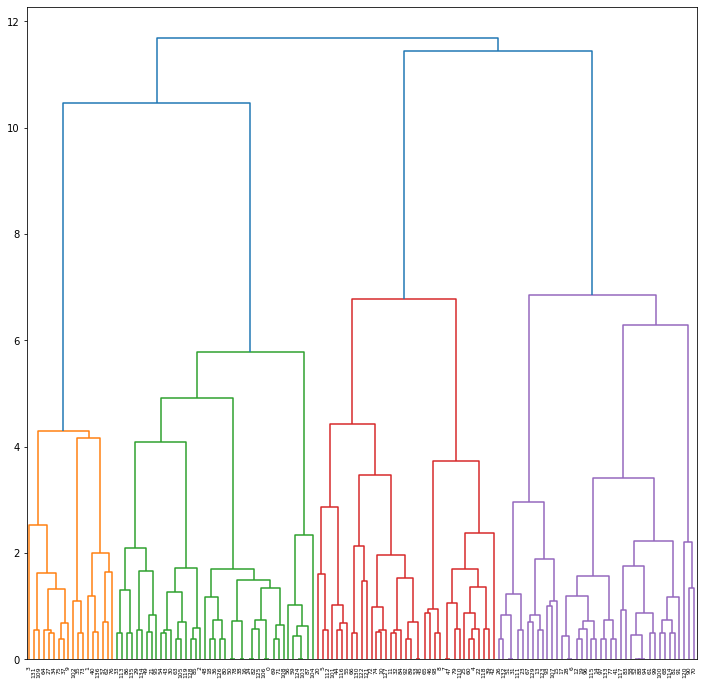

In [40]:
# grouping data based on Ward distance
standard_mergings_ward2 = linkage(y = hult_pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward2,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot

plt.show()

## Developing inertia

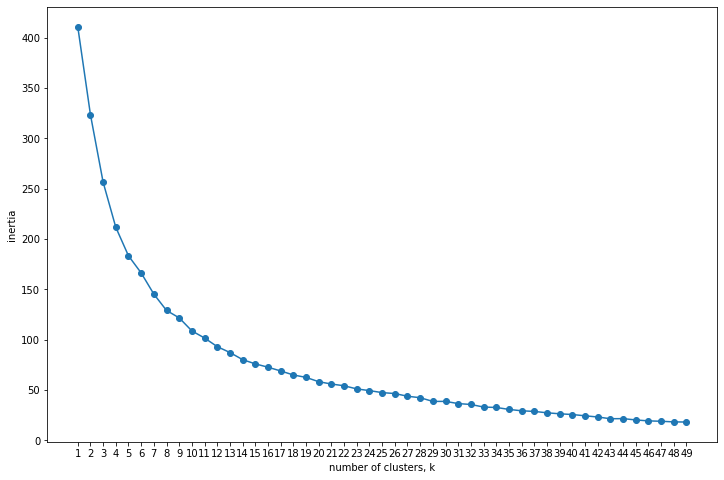

In [41]:
# calling the inertia_plot() function
interia_plot(data = hult_pca_scaled)

### k-Means model -hult

In [42]:
# INSTANTIATING a k-Means object with clusters
hult_k_pca = KMeans(n_clusters   = 5,
                         random_state = 219)


# fitting the object to the data
hult_k_pca.fit(hult_pca_scaled)


# converting the clusters to a DataFrame
hult_kmeans_pca = pd.DataFrame({'Cluster': hult_k_pca.labels_})


# checking the results
print(hult_kmeans_pca.iloc[: , 0].value_counts())

4    34
3    30
0    27
1    26
2    20
Name: Cluster, dtype: int64


#### Display Centroid

In [43]:
# storing cluster centers
centroids_pca2 = hult_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df2 = pd.DataFrame(centroids_pca2)


# renaming principal components
centroids_pca_df2.columns = ['shy',                 
                             'less-communicator',        
                             'inspirational-foster'] 


# checking results (clusters = rows, pc = columns)
centroids_pca_df2.round(2)

,shy,less-communicator,inspirational-foster
0,-0.62,0.89,-0.64
1,0.03,0.10,1.34
2,-1.32,-0.67,0.29
3,1.09,0.58,0.03
4,0.29,-0.89,-0.71


In [44]:
# concatenating cluster memberships with principal components
hult_lst_pca_df = pd.concat([hult_kmeans_pca,
                         hult_dna],
                         axis = 1)


# checking results
hult_lst_pca_df


# concatenating demographic information with pca-clusters
final_hult_lst_pca_df = pd.concat([survey_data_df.loc[ : , ['What laptop would you buy in next assuming if all laptops cost the same?'
                                                          , 'What program are you in?','What is your age?','What laptop do you currently have?',
                                                          'continents']],
                                hult_lst_pca_df],
                                axis = 1)


# renaming columns
final_hult_lst_pca_df.columns = ['What laptop would you buy in next assuming if all laptops cost the same?', 
                              'What program are you in?', 
                              'What is your age?',
                              'What laptop do you currently have?',
                              'continents', 
                              'Cluster',
                              'shy',                
                             'less-communicator',         
                             'team_spirit']


# checking the results
print(final_hult_lst_pca_df.head(n = 5))


  What laptop would you buy in next assuming if all laptops cost the same?          What program are you in? What is your age? What laptop do you currently have?     continents  Cluster  shy  less-communicator  team_spirit
0                                                                  Macbook     DD (MIB & Business Analytics)       25-30 years                            Macbook  south_america        4   18                 19           30
1                                                           Windows laptop       One year Business Analytics       25-30 years                     Windows laptop  south_america        1   16                 18           34
2                                                           Windows laptop       One year Business Analytics       25-30 years                     Windows laptop           asia        3   17                 15           26
3                                                           Windows laptop       One year Business Analytics

In [45]:
# renaming What laptop would you buy in next assuming if all laptops cost the same?
laptops_desired = {1 : 'Chromebook',
                 2 : 'Windows laptop',
                 3 :  'Macbook'}


final_hult_lst_pca_df['What laptop would you buy in next assuming if all laptops cost the same?'].replace(laptops_desired, inplace = True)

# renaming What laptop do you currently have?
laptops_you_have = {1 : 'Windows laptop',
                 2 : 'Macbook' }


final_hult_lst_pca_df['What laptop do you currently have?'].replace(laptops_you_have, inplace = True)

# renaming What program are you in?
programm_enrolled = {1 : 'DD (MIB & Business Analytics)',
                2 : 'DD (MBA & Business Analytics)',
                3 : 'DD (MBA & Business Analytics)',
                4 :  'One year Business Analytics'}


final_hult_lst_pca_df['What program are you in?'].replace(programm_enrolled, inplace = True)

# renaming What is your age? 
age_group = {1 : '0-20 years',
                2 : '20-25 years',
                3 : '25-30 years',
                4 :  '30-35 years',
                5 : '35+ years'}


final_hult_lst_pca_df['What is your age?'].replace(age_group, inplace = True)

# renaming What is your age? 
continents_names = {1 :'europe',
                2 : 'africa',
                3 : 'asia',
                4 :  'north_america',
                5 : 'south_america'}


final_hult_lst_pca_df['continents'].replace(continents_names, inplace = True)

# renaming What is your age?
cluster_names = {0 : 'Cluster 0',
                 1 : 'Cluster 1',
                 2 : 'Cluster 2',
                 3 : 'Cluster 3',
                 4 : 'Cluster 4'}


final_hult_lst_pca_df['Cluster'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df2 = final_hult_lst_pca_df


# checking results
data_df2

,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,What laptop do you currently have?,continents,Cluster,shy,less-communicator,team_spirit
0,Macbook,DD (MIB & Business Analytics),25-30 years,Macbook,south_america,Cluster 4,18,19,30
1,Windows laptop,One year Business Analytics,25-30 years,Windows laptop,south_america,Cluster 1,16,18,34
2,Windows laptop,One year Business Analytics,25-30 years,Windows laptop,asia,Cluster 3,17,15,26
3,Windows laptop,One year Business Analytics,25-30 years,Windows laptop,asia,Cluster 2,17,23,39
4,Windows laptop,DD (MBA & Disruptive innovation),25-30 years,Macbook,asia,Cluster 4,17,18,25
5,Macbook,DD (MIB & Business Analytics),20-25 years,Macbook,asia,Cluster 4,15,20,26
6,Macbook,DD (MIB & Business Analytics),20-25 years,Windows laptop,north_america,Cluster 0,20,20,33
7,Windows laptop,DD (MIB & Business Analytics),25-30 years,Windows laptop,europe,Cluster 0,19,19,29
8,Macbook,DD (MBA & Business Analytics),35+ years,Macbook,asia,Cluster 0,20,19,29
9,Chromebook,DD (MBA & Business Analytics),30-35 years,Windows laptop,south_america,Cluster 1,18,20,35


### Boxplot Analysis- Hult

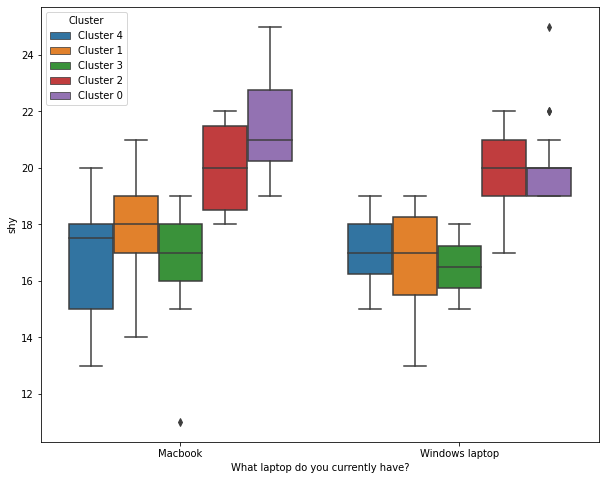

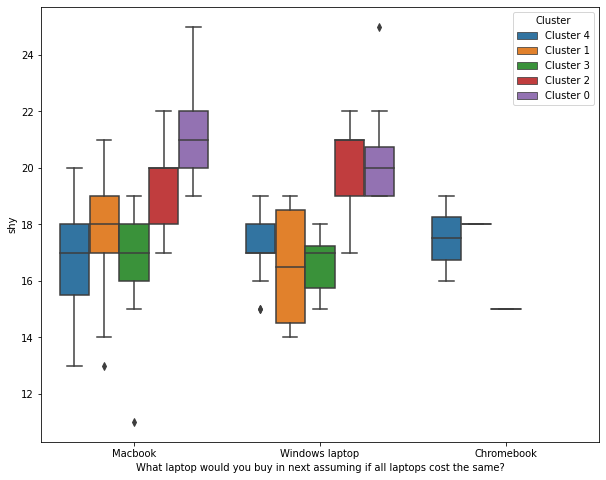

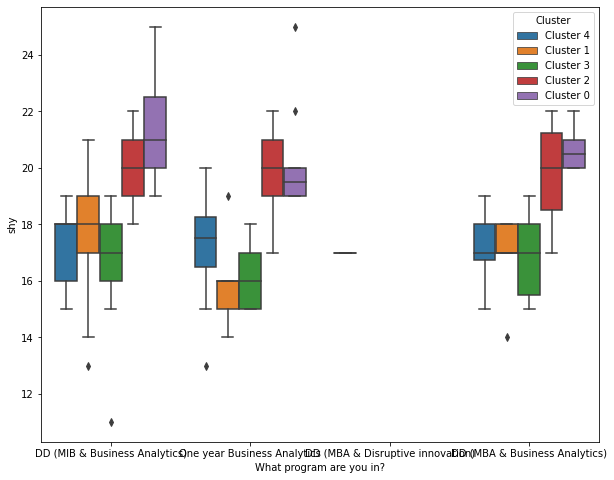

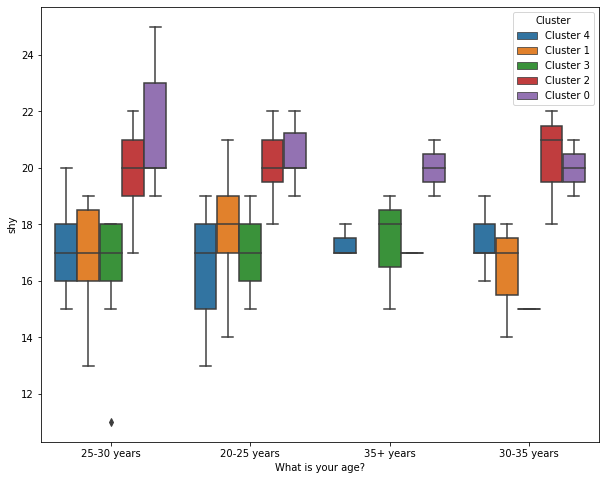

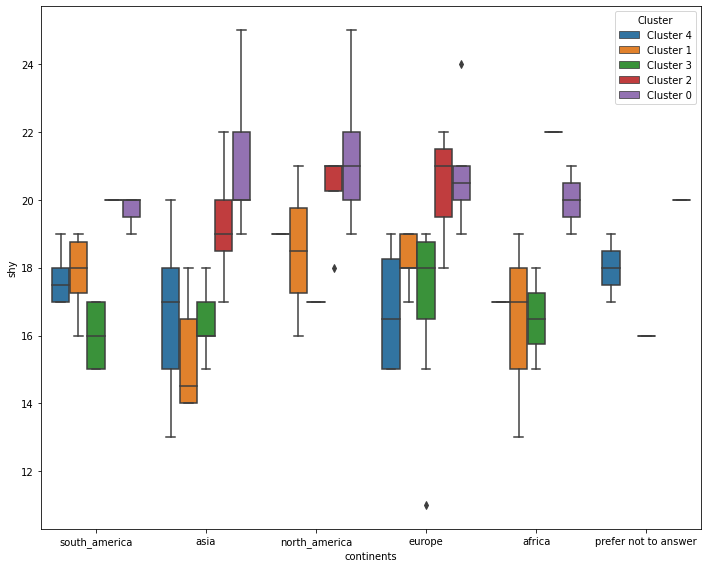

In [46]:
########################
# Hult DNA Boxplot
########################

# Carnivores
fig, ax = plt.subplots(figsize = (10, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'shy',
            hue = 'Cluster',
            data = data_df2)

fig, ax = plt.subplots(figsize = (10, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'shy',
            hue = 'Cluster',
            data = data_df2)

fig, ax = plt.subplots(figsize = (10, 8))
sns.boxplot(x = 'What program are you in?',
            y = 'shy',
            hue = 'Cluster',
            data = data_df2)

fig, ax = plt.subplots(figsize = (10, 8))
sns.boxplot(x = 'What is your age?',
            y = 'shy',
            hue = 'Cluster',
            data = data_df2)

fig, ax = plt.subplots(figsize = (10, 8))
sns.boxplot(x = 'continents',
            y = 'shy',
            hue = 'Cluster',
            data = data_df2)
##########################

# formatting and displaying the plot
plt.tight_layout()
plt.show()

In the shy persona,  we noticed that clusters 0 and 2 preferred Macbooks. Nevertheless, cluster 0 has a higher preference for Macbook compare to cluster 2 which indicates that  MacBook has higher user stickiness for this cluster.

Cluster 0 and cluster 2 are also mostly dual degree students, suggesting that MacBooks are more attractive to those with more than one year of studying and experience using laptops in class.This is because the MacBook is more portable and operational for those who need to use a laptop in the classroom. They also prefer to use the type of computer they are familiar with.

At the same time, because of their personality traits, they will choose more popular computers to make themselves more in tune with others. This also fits the main age group of cluster 0 and cluster 2，20-30-year-olds will pay more attention to trends and tend to socialize.

In summary, for this type of personality I recommend, that let them learn more about the advantages of the MacBook in terms of learning and social aspects, which will help the promotion of the MacBook.They will also be a stable customer base for MacBook.

#  Recommnedation

The macbook target customers are students at the age of 20 to 30 who have more than one year of academic experience. Apple needs to allocate more resources to make them aware that the macbook is a excellent choice that promotes student socialization and  popular among young people.Apple could promote their products on social media, claiming to be a trendsetter and social catalyst for young people. At the same time, Apple can give new student users appropriate discounts to expand their user base and trade-in policies to develop user stickiness.In addition based on the box plot analysis it will be beneficial for them to expand their target towards Asia and Europe

# Bibliography

David Susman, P. (2021, February 20). https://www.verywellmind.com/. Retrieved from https://www.verywellmind.com/the-big-five-personality-dimensions-2795422#:~:text=The%20five%20broad%20personality%20traits,how%20many%20personality%20traits%20exist.

Jackson, D. N. (2014). https://ipip.ori.org. Retrieved from https://ipip.ori.org/newBigFive5broadKey.htm

Shaheem, D. S. (2019, february ). https://www.hult.edu. Retrieved from https://www.hult.edu/blog/why-every-leader-needs-growth-mindset/

